In [26]:
import pandas as pd
import numpy as np

In [27]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8,
0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [28]:
np.log(10) # == 2.3025
# meaning that e ^ 2.302 == 10

2.3025850929940459

In [29]:
# to prove that
2.71828**2.3025850929940459 # == 9.9999
# e ^ log(10) == 10

9.999984511610785

In [30]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


In [31]:
prob = .25
odds = prob / (1 - prob)

odds

0.3333333333333333

In [32]:
logodds = np.log(odds)

logodds

-1.0986122886681098

In [33]:
# read the data and set the datetime as the index
# taken from Kaggle: https://www.kaggle.com/c/bike-sharing-demand/data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

average_bike_rental = bikes['count'].mean()

In [34]:
# Make a cateogirical response
bikes['above_average'] = bikes['count'] >= average_bike_rental

In [35]:
bikes['above_average'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: above_average, dtype: float64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

feature_cols = ['temp']
# using only temperature

X = bikes[feature_cols]
y = bikes['above_average']
# make our overall X and y variables, this time our y is
# out binary response variable, above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)
# make our train test split

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of out of sample performance

C:\Users\admin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.67523879500367379

In [38]:
bikes['hour'] = bikes['datetime'].apply(lambda x:int(x[11]+x[12]))
# make a column that is just the hour of the day

bikes['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [40]:
# this function takes in an integer hour
# and outputs one of our four options
def when_is_it(hour):
    if hour >= 5 and hour < 11:
        return "morning"
    elif hour >= 11 and hour < 16:
        return "afternoon"
    elif hour >= 16 and hour < 18:
        return "rush_hour"
    else:
        return "off_hours"

In [41]:
bikes['when_is_it'] = bikes['hour'].apply(when_is_it)
bikes[['when_is_it', 'above_average']].head()

,when_is_it,above_average
0,off_hours,False
1,off_hours,False
2,off_hours,False
3,off_hours,False
4,off_hours,False


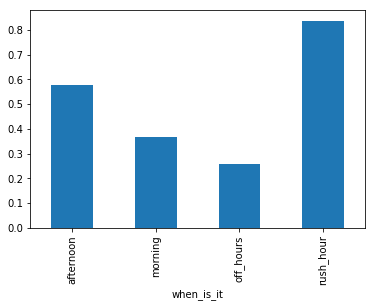

In [42]:
bikes.groupby('when_is_it').above_average.mean().plot(kind='bar')

In [43]:
when_dummies = pd.get_dummies(bikes['when_is_it'], prefix='when__')
when_dummies.head()

,when___afternoon,when___morning,when___off_hours,when___rush_hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [44]:
when_dummies = when_dummies.iloc[:, 1:]
# remove the first column

when_dummies.head()

,when___morning,when___off_hours,when___rush_hour
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [45]:
X = when_dummies
# our new X is our dummy variables
y = bikes.above_average

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of out of sample performance

0.67523879500367379

In [46]:
new_bike = pd.concat([bikes[['temp', 'humidity']], when_dummies], axis=1)
# combine temperature, humidity, and the dummy variables

X = new_bike
# our new X is our dummy variables
y = bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()
# instantate our model

logreg.fit(X_train, y_train)
# fit our model to our training set

logreg.score(X_test, y_test)
# score it on our test set to get a better sense of out of sample performance

0.74173401910360026